<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/logo-bdc.png" align="right" width="64"/>

# <span style="color:#336699">Web Time Series Service 2 (WTSS-2) - Examples with a polygon</span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/blob/master/jupyter/R/wtss/wtss-examples.ipynb"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br>

<div style="text-align: center;font-size: 90%;">
    Felipe Carvalho de Souza<sup><a href="https://orcid.org/0000-0002-5826-1700"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Felipe Menino Carlos<sup><a href="https://orcid.org/0000-0002-3334-4315"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Rennan F. B. Marujo<sup><a href="https://orcid.org/0000-0002-0082-9498"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:brazildatacube@inpe.br">brazildatacube@inpe.br</a>
    <br/><br/>
    Last Update: March 31, 2023
</div>

<br>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b> This Jupyter Notebook shows how to use the WTSS service to extract time series from <em>Brazil Data Cube</em>' service using polygons.
</div>    

<br>
<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;font-size: 75%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>This Jupyter Notebook is a supplement to the following paper:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    Vinhas, L.; Queiroz, G. R.; Ferreira, K. R.; Camara, G. <a href="http://www.seer.ufu.br/index.php/revistabrasileiracartografia/article/view/44004" target="_blank">Web Services for Big Earth Observation Data</a>. Revista Brasileira de Cartografia, v. 69, n. 5, 18 maio 2017.
    </div>
</div>

# R Client API
<hr style="border:1px solid #0077b9;">

The command below installs the additional packages that are required to run this Jupyter Notebook.

In [48]:
# Remove '#' to install the packages
# install.packages(c("remotes", "magrittr", "dplyr", "tibble", "tidyr"))

In [49]:
token <- "change-me"

For running the examples in this Jupyter Notebook you will need to install the [Rwtss client for R in development version](https://github.com/oldlipe/Rwtss).

In [50]:
# Remove '#' to install the package
remotes::install_github("oldlipe/Rwtss@dev", upgrade = "never")

Skipping install of 'Rwtss' from a github remote, the SHA1 (96ba64de) has not changed since last install.
  Use `force = TRUE` to force installation



In [51]:
library(Rwtss)    # Package Rwtss
library(magrittr) # Package to use pipe operator %>%
library(leaflet)  # Package for the interactive mapping
library(sf)       # Package for creating geometries

Before we start, let's create a variable that corresponds to the URL of the INPE WTSS service.

In [52]:
wtss_inpe <- "https://brazildatacube.dpi.inpe.br/dev/wtss/v2/"

# Defining a MultiPoint
<hr style="border:1px solid #0077b9;">

Let's create a MultiPoint geometry to extract the time series.

In [53]:
#
# Creating a MultiPoint 
#
multi_point <- sf::st_multipoint(rbind(c(-45.88337, -23.18425), c(-45.96785, -23.30260)))

#
# Add a CRS
#
multi_point <- sf::st_sfc(multi_point, crs = 4326)

In [54]:
#
# Interactive map creation
#
leaflet::leaflet(width="100%", height="600px") %>%
   addProviderTiles(providers$Esri.WorldImagery) %>%
   setView(lng = -45.88337, lat = -23.18425, zoom = 10) %>%
   addCircleMarkers(data   = sf::st_cast(multi_point, "POINT"),
                    radius = 4,
                    stroke = FALSE,
                    fillOpacity = 1)

HTML widgets cannot be represented in plain text (need html)

In [55]:
#
# Get time series from each point
#
ts_mp <- time_series(
    URL           = wtss_inpe, 
    name          = "S2-16D-2", 
    attributes    = c("NDVI", "EVI"),
    geom          = multi_point,
    start_date    = "2020-01-01",
    end_date      = "2020-08-28",
    token         = token
)

In [56]:
#
# Printing time series table
#
print(ts_mp)

# A tibble: 2 × 5
  longitude latitude label   cube     time_series      
      <dbl>    <dbl> <chr>   <chr>    <list>           
1     -45.9    -23.2 NoLabel S2-16D-2 <tibble [16 × 3]>
2     -46.0    -23.3 NoLabel S2-16D-2 <tibble [16 × 3]>


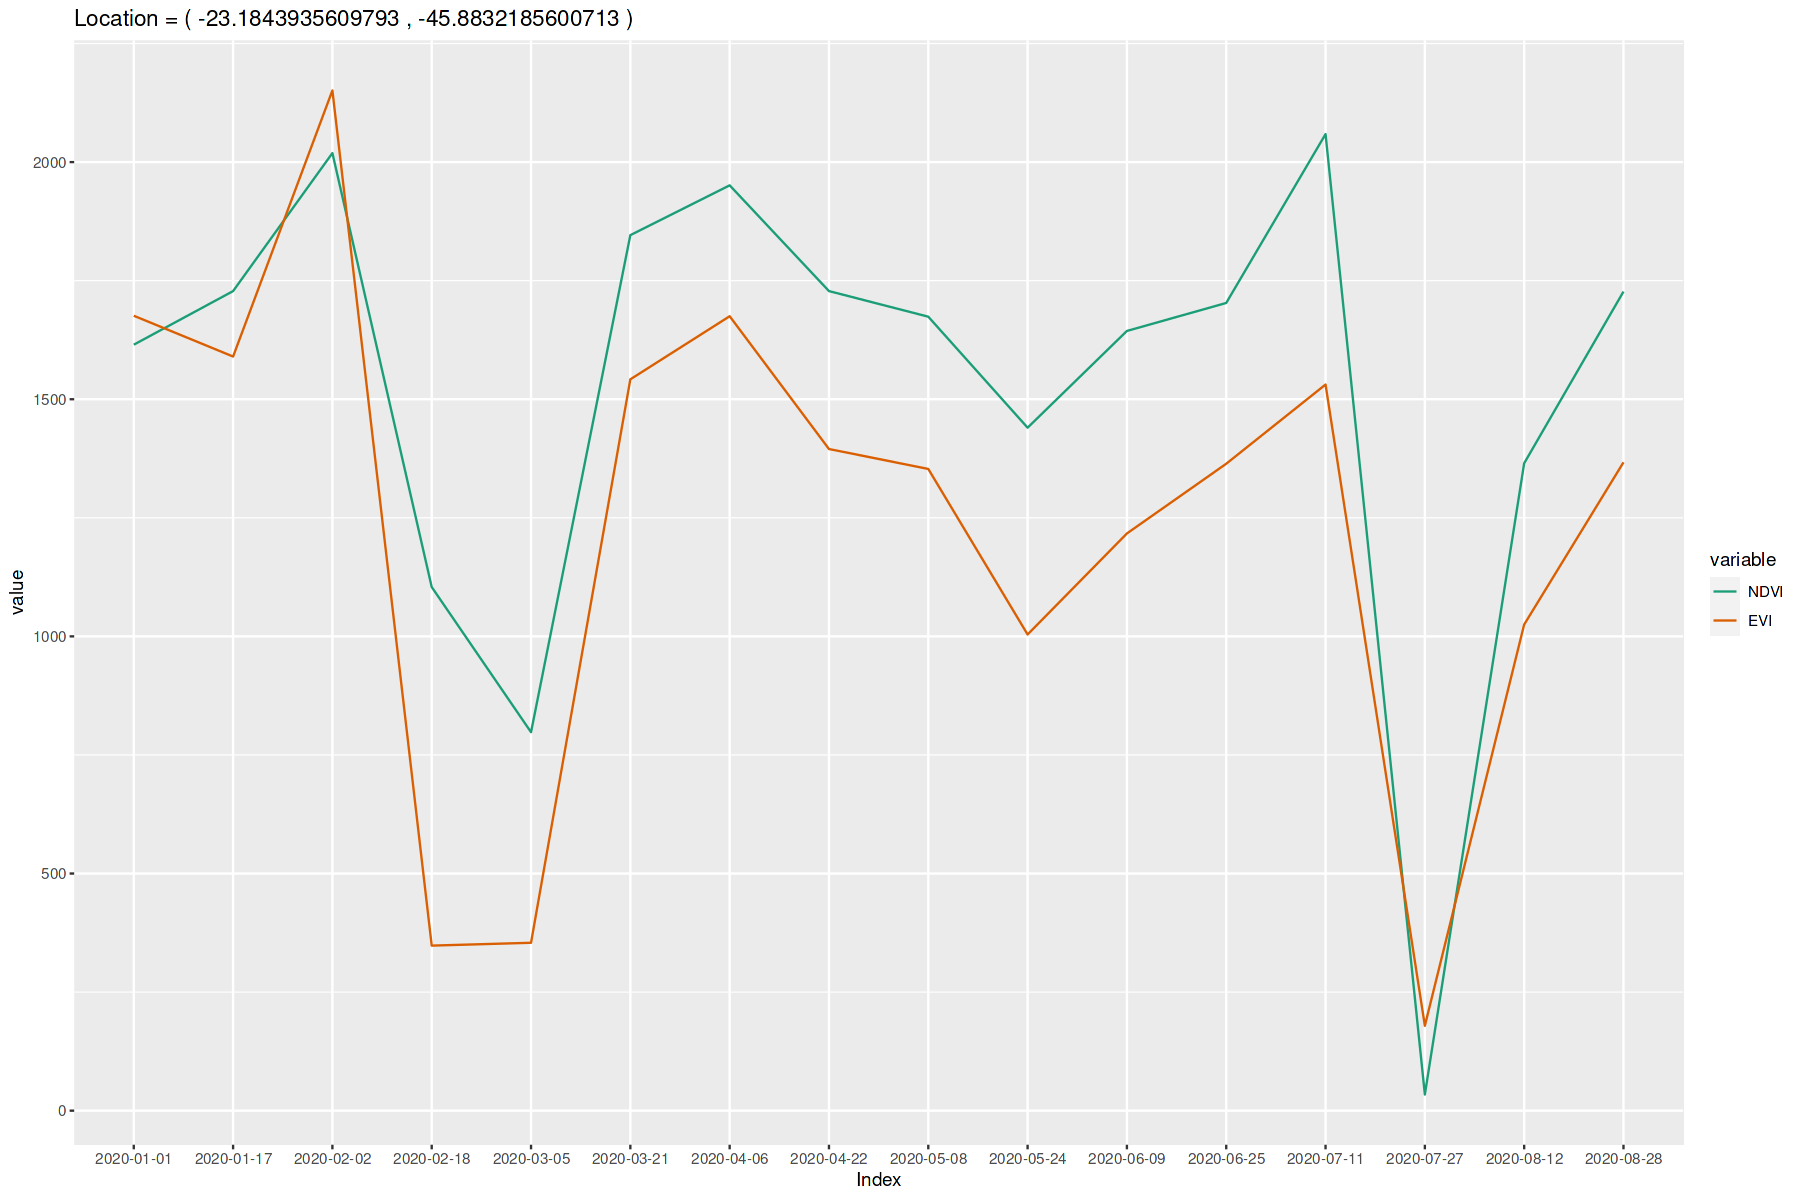

In [57]:
#
# Adjusting plot size
#
options(repr.plot.width = 15, repr.plot.height = 10)

#
# Plotting time series
#
plot(ts_mp)

# Defining a MultiPolygon
<hr style="border:1px solid #0077b9;">

Now we will create a MultiPolygon to extract the time series.

In [58]:
#
# Defining polygons
# 
poly1 <- sf::st_polygon(
    list(matrix(c(-46.22481, -12.73876,
                  -46.22323, -12.74593,
                  -46.21414, -12.73841,
                  -46.22481, -12.73876), 
                ncol = 2, byrow = TRUE))
)

poly2 <- sf::st_polygon(
    list(matrix(c(-46.22165, -12.73991,
                  -46.22197, -12.74201,
                  -46.21962, -12.74031,
                  -46.22165, -12.73991), 
                ncol = 2, byrow = TRUE))
)

#
# Creating a MultiPolygon geometry
#
multi_poly <- sf::st_multipolygon(list(poly1, poly2))

#
# Add a CRS
#
multi_poly <- sf::st_sfc(multi_poly, crs = 4326)

In [59]:
#
# Interactive map creation
#
leaflet::leaflet(multi_poly, width="100%", height="600px") %>%
    addPolygons(color = "#444444", weight = 1, smoothFactor = 0.5,
    opacity = 1.0, fillOpacity = 0.5) %>%
   addProviderTiles(providers$Esri.WorldImagery) %>%
   setView(lng = -46.221, lat = -12.743, zoom = 15)

HTML widgets cannot be represented in plain text (need html)

In [60]:
#
# Get time series from each point inside of a polygon
#
ts_poly <- time_series(
    URL = wtss_inpe, 
    name = "CB4-16D-2",
    attributes = c("NDVI", "EVI"),
    geom = multi_poly,
    start_date = "2020-08-01",
    end_date = "2021-07-31",
    token = token
)

In [61]:
#
# Printing time series table
#
print(ts_poly)

# A tibble: 266 × 5
   longitude latitude label   cube      time_series      
       <dbl>    <dbl> <chr>   <chr>     <list>           
 1     -46.2    -12.7 NoLabel CB4-16D-2 <tibble [24 × 3]>
 2     -46.2    -12.7 NoLabel CB4-16D-2 <tibble [24 × 3]>
 3     -46.2    -12.7 NoLabel CB4-16D-2 <tibble [24 × 3]>
 4     -46.2    -12.7 NoLabel CB4-16D-2 <tibble [24 × 3]>
 5     -46.2    -12.7 NoLabel CB4-16D-2 <tibble [24 × 3]>
 6     -46.2    -12.7 NoLabel CB4-16D-2 <tibble [24 × 3]>
 7     -46.2    -12.7 NoLabel CB4-16D-2 <tibble [24 × 3]>
 8     -46.2    -12.7 NoLabel CB4-16D-2 <tibble [24 × 3]>
 9     -46.2    -12.7 NoLabel CB4-16D-2 <tibble [24 × 3]>
10     -46.2    -12.7 NoLabel CB4-16D-2 <tibble [24 × 3]>
# … with 256 more rows


In [62]:
#
# Printing time series values
#
print(ts_poly$time_series[[1]])

# A tibble: 24 × 3
   Index       NDVI   EVI
   <chr>      <int> <int>
 1 2020-07-27  3462  2369
 2 2020-08-12  3083  1992
 3 2020-08-28  2384  1612
 4 2020-09-13  2201  1557
 5 2020-09-29  2252  1537
 6 2020-10-15  2012  1530
 7 2020-10-31  3336  2517
 8 2020-11-16  4406  3083
 9 2020-12-02  3664  3324
10 2020-12-18  8985  9012
# … with 14 more rows


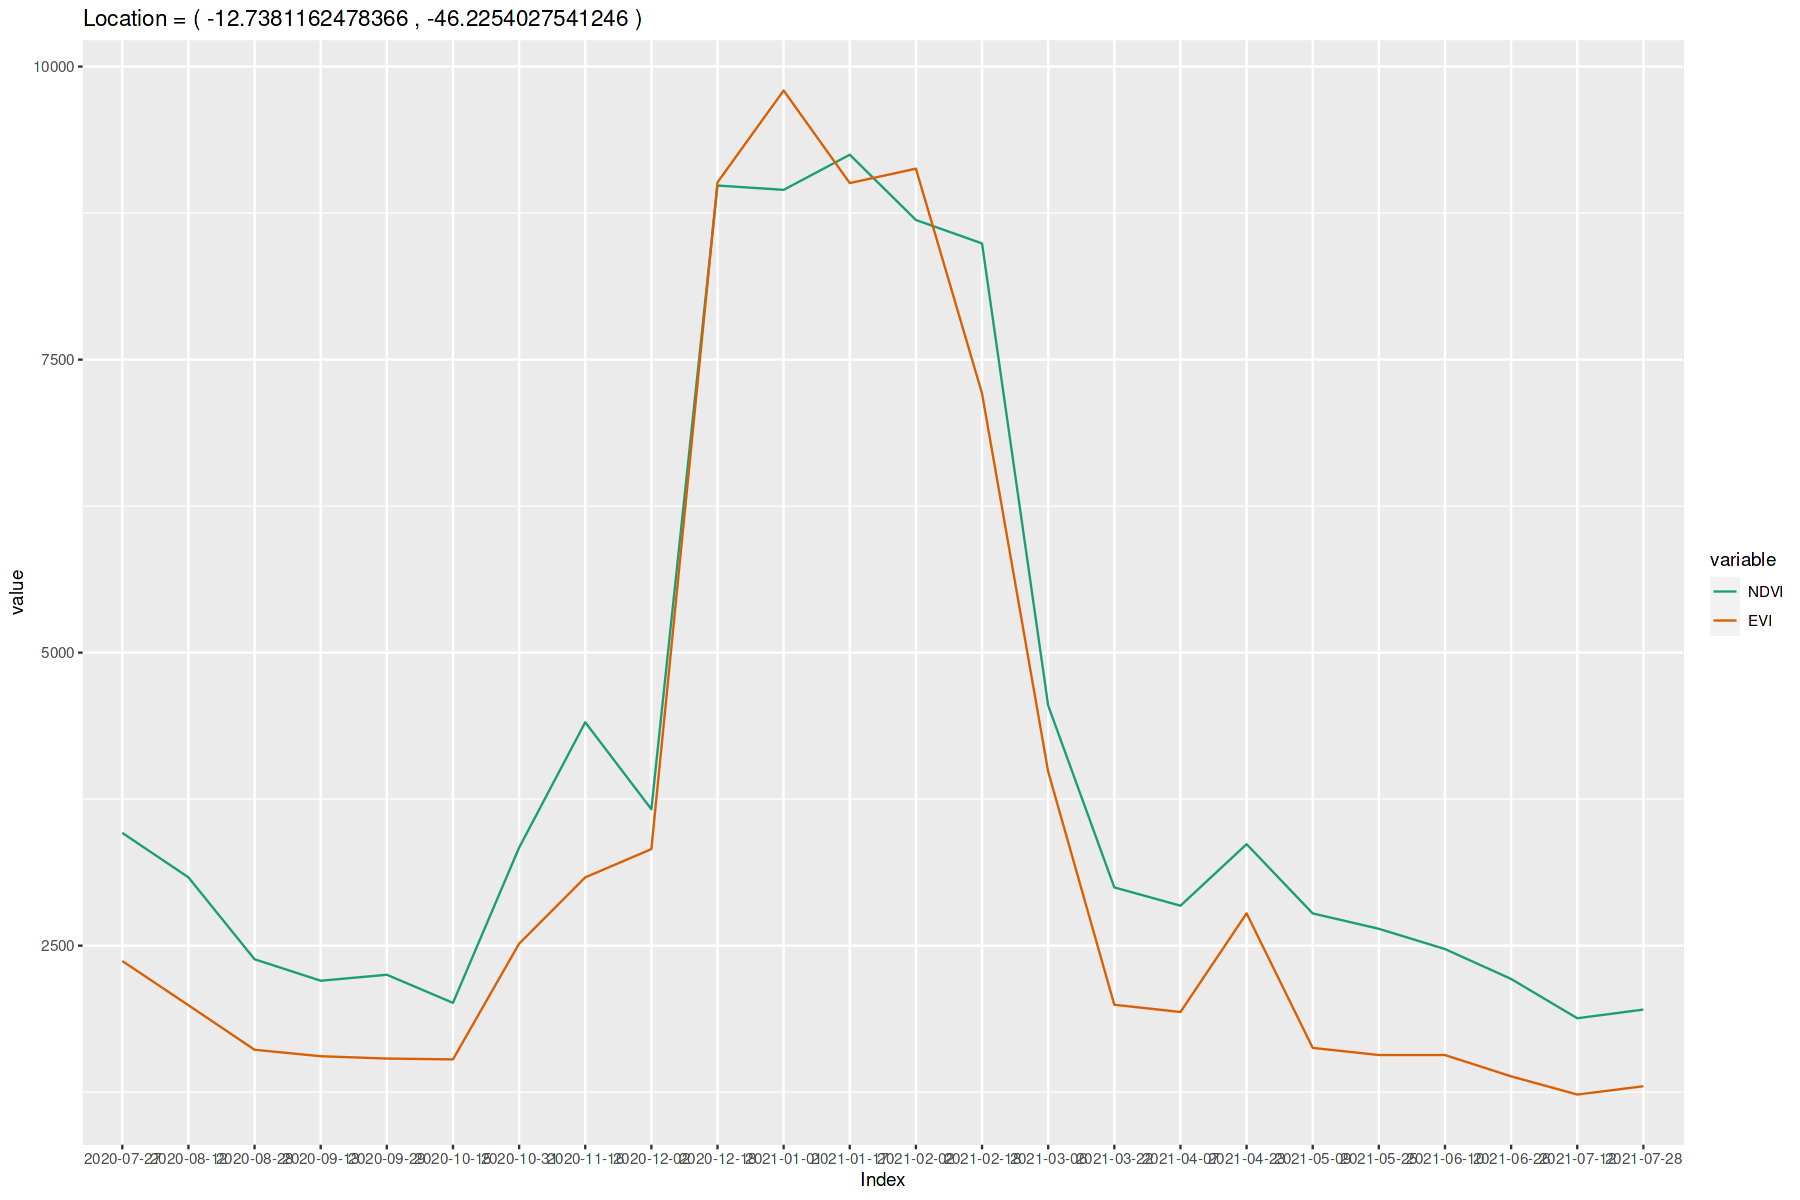

In [63]:
#
# Plotting time series point
#
plot(ts_poly)

In [64]:
#
# Getting the polygons points
#
ts_sf <- sf::st_as_sf(ts_poly, coords = c("longitude", "latitude"), crs = 4326)

In [65]:
#
# Interactive map creation
#
leaflet::leaflet(multi_poly, width="100%", height="600px") %>%
    addPolygons(color = "#444444", weight = 1, smoothFactor = 0.5,
    opacity = 1.0, fillOpacity = 0.5) %>%
   addProviderTiles(providers$Esri.WorldImagery) %>%
   setView(lng = -46.221, lat = -12.743, zoom = 15) %>%
   addCircleMarkers(data   = ts_sf,
                    radius = 4,
                    stroke = FALSE,
                    fillOpacity = 1)

HTML widgets cannot be represented in plain text (need html)

# References
<hr style="border:1px solid #0077b9;">

- [WTSS Server](https://github.com/brazil-data-cube/wtss)

- [WTSS OpenAPI 3 Specification](https://github.com/brazil-data-cube/wtss-spec)

- [R Client Library for Web Time Series Service - Github Repository](https://github.com/e-sensing/wtss)

